In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

# Main setup
import imagej
ij = imagej.init(['io.github.mianalysis:mia-plugin:2.0.0-SNAPSHOT'])

from jpype import JClass
from scyjava import jimport
from src.objects.units import Units, MICROMETRE
from src.utilities.imagerenderer import NotebookImageRenderer
from src.utilities.store import Store
from src.wrappers.coordinatesetwrapper import CoordinateSetFactoryWrapper
from src.wrappers.imagewrapper import ImageWrapper, ImageFactoryWrapper
from src.wrappers.measurementwrapper import MeasurementFactoryWrapper
from src.wrappers.metadatawrapper import MetadataWrapper
from src.wrappers.objwrapper import ObjFactoryWrapper
from src.wrappers.objswrapper import ObjsFactoryWrapper
from src.wrappers.volumewrapper import VolumeFactoryWrapper
from src.wrappers.workspacewrapper import WorkspaceWrapper

from src.modules.demomodule import ModuleDemo

import time

Store.ij = ij
Units.spatial_units = MICROMETRE

# Setting renderer
ImageI = jimport('io.github.mianalysis.mia.object.image.ImageI')
ImageI.setGlobalRenderer(NotebookImageRenderer())
ImageI.setUseGlobalImageRenderer(True)

# Setting image factory
ImageFactories = jimport('io.github.mianalysis.mia.object.image.ImageFactories')
image_factory = ImageFactoryWrapper()
ImageFactories.addFactory(image_factory)
ImageFactories.setDefaultFactory(image_factory)

# Setting objects factory (both obj and objs factories must be enabled together)
ObjsFactories = jimport('io.github.mianalysis.mia.object.ObjsFactories')
objs_factory = ObjsFactoryWrapper()
ObjsFactories.addFactory(objs_factory)
ObjsFactories.setDefaultFactory(objs_factory)

# Setting object factory (both obj and objs factories must be enabled together)
ObjFactories = jimport('io.github.mianalysis.mia.object.coordinates.ObjFactories')
obj_factory = ObjFactoryWrapper()
ObjFactories.addFactory(obj_factory)
ObjFactories.setDefaultFactory(obj_factory)

# Setting volume factory
VolumeFactories = jimport('io.github.mianalysis.mia.object.coordinates.volume.VolumeFactories')
volume_factory = VolumeFactoryWrapper()
VolumeFactories.addFactory(volume_factory)
VolumeFactories.setDefaultFactory(volume_factory)

# Setting coordinateset factory
CoordinateSetFactories = jimport('io.github.mianalysis.mia.object.coordinates.volume.CoordinateSetFactories')
coordinate_set_factory = CoordinateSetFactoryWrapper()
CoordinateSetFactories.addFactory(coordinate_set_factory)
CoordinateSetFactories.setDefaultFactory(coordinate_set_factory)

# Setting measurement factory
MeasurementFactories = jimport('io.github.mianalysis.mia.object.measurements.MeasurementFactories')
measurement_factory = MeasurementFactoryWrapper()
MeasurementFactories.addFactory(measurement_factory)
MeasurementFactories.setDefaultFactory(measurement_factory)

# Module imports
ImageLoader = jimport('io.github.mianalysis.mia.module.inputoutput.ImageLoader')

[INFO] Overriding MIA; identifier: command:io.github.mianalysis.mia.MIA_; jar: file:/Users/sc13967/.jgo/io.github.mianalysis/mia-plugin/2.0.0-SNAPSHOT/d2fe3ba7f0550a523403e0d047b1788b5d374c2a09c72a0b89f635395f421067/mia-plugin-2.0.0-SNAPSHOT.jar
[INFO] Overriding MIA (headless); identifier: command:io.github.mianalysis.mia.MIAHeadless; jar: file:/Users/sc13967/.jgo/io.github.mianalysis/mia-plugin/2.0.0-SNAPSHOT/d2fe3ba7f0550a523403e0d047b1788b5d374c2a09c72a0b89f635395f421067/mia-core-2.0.0-SNAPSHOT.jar


<java object 'io.github.mianalysis.mia.object.system.Status'>

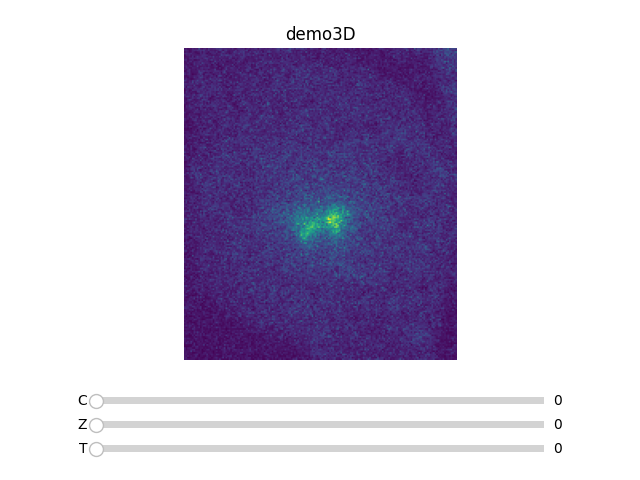

In [3]:
# %matplotlib notebook

input_path = "/Users/sc13967/Documents/Programming/Python/mia-python/mitosis.tif"
series_number = 1
raw_image_name = "demo3D"

workspace = WorkspaceWrapper(1, input_path, series_number, None)

imageLoader = ImageLoader(None)
imageLoader.updateParameterValue(ImageLoader.OUTPUT_IMAGE, raw_image_name)
imageLoader.updateParameterValue(ImageLoader.SET_SPATIAL_CAL, True)
imageLoader.updateParameterValue(ImageLoader.XY_CAL, 0.23)
imageLoader.updateParameterValue(ImageLoader.Z_CAL, 1)
# imageLoader.updateParameterValue(ImageLoader.CHANNELS, "1")
# imageLoader.updateParameterValue(ImageLoader.SLICES, "4")
# imageLoader.updateParameterValue(ImageLoader.FRAMES, "3")
# imageLoader.updateParameterValue(ImageLoader.CROP_MODE, ImageLoader.CropModes.FIXED)
# imageLoader.updateParameterValue(ImageLoader.LEFT, 0)
# imageLoader.updateParameterValue(ImageLoader.TOP, 0)
# imageLoader.updateParameterValue(ImageLoader.WIDTH, 400)
# imageLoader.updateParameterValue(ImageLoader.HEIGHT, 400)
imageLoader.setShowOutput(True)
imageLoader.process(workspace)